Retail is another industry which extensively uses analytics to optimize business processes. 

Tasks like product placement, inventory management, customized offers, product bundling, etc. are being smartly handled using data science techniques.

As the name suggests, this data comprises of transaction records of a sales store. This is a regression problem.

The data has 8523 rows of 12 variables.

# Regression problem

Problem: Predict the sales of a store.

# Sales Prediction-Big mart outlets
1. BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. 
2.  certain attributes of each product and store have been defined.
3.  Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales and use that information to take the correct measures to ensure success of their business.

In [875]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# read the train and test dataset
df_train_sales = pd.read_csv('train_bigmart.csv')
df_train_sales.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [876]:
df_train_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [877]:
df_train_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# data  visualization & feature engineering


In [878]:
df_train_sales.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


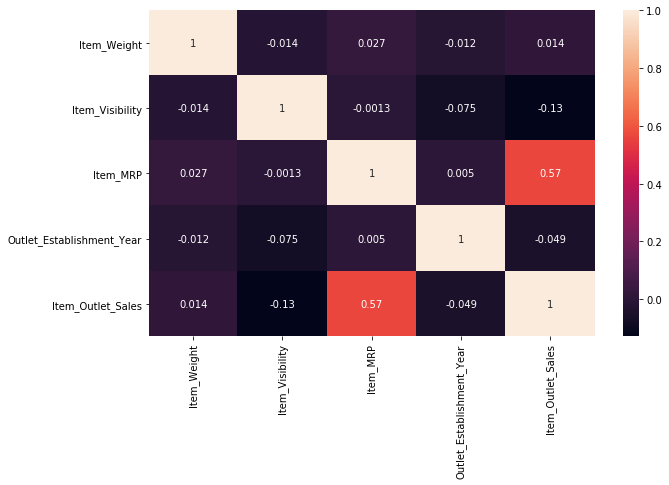

In [879]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df_train_sales.corr(),annot=True)

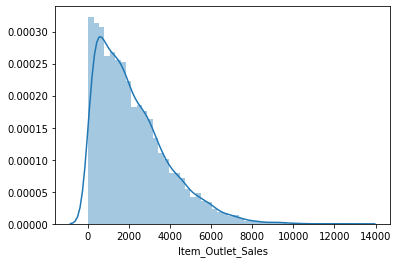

In [880]:
sns.distplot(df_train_sales['Item_Outlet_Sales'])

In [881]:
df_train_sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

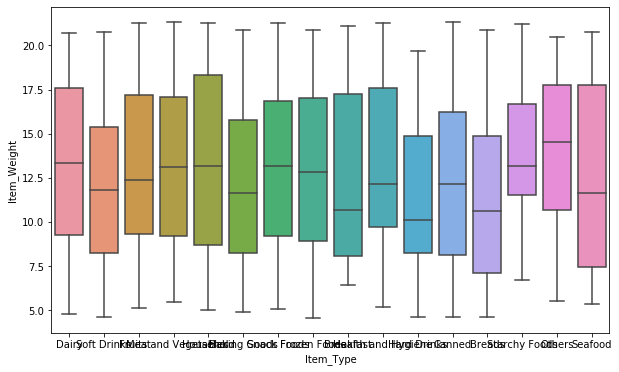

In [882]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Item_Type',y="Item_Weight",data=df_train_sales)

In [883]:
df_train_sales['Item_Weight'].mean()

12.857645184136183

In [884]:
import warnings
warnings.filterwarnings('ignore')
df_train_sales['Item_Weight'][df_train_sales['Item_Weight'].isnull()]=df_train_sales['Item_Weight'].mean()

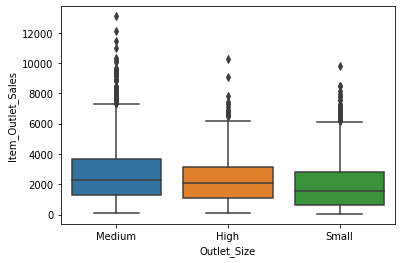

In [885]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data= df_train_sales)

In [886]:
df_sale=df_train_sales[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales',]]

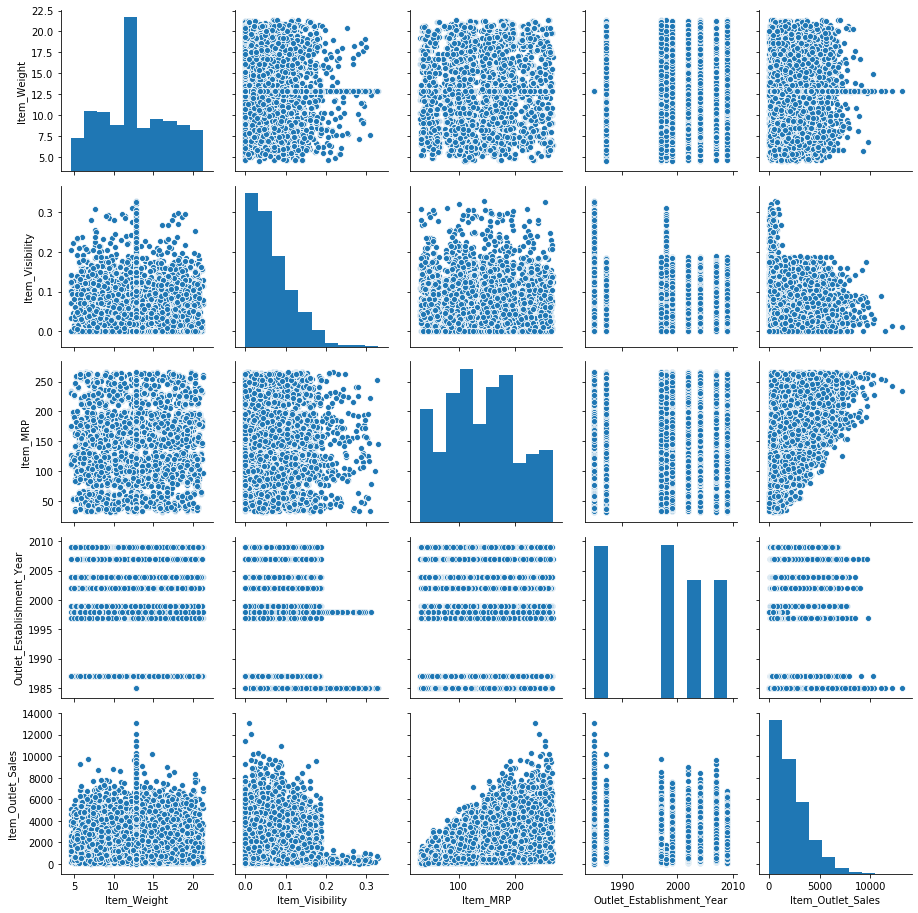

In [887]:
sns.pairplot(df_sale)

# Data Modeling

In [888]:
X= df_sale.drop(['Item_Outlet_Sales'],axis=1)
y=df_sale['Item_Outlet_Sales']

In [889]:
from sklearn.model_selection import train_test_split
# train-test-split   
X_train , X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.33,random_state=105)


In [890]:
# shape of the dataset
print('\nShape of training data :',df_train_sales.shape)



Shape of training data : (8523, 12)


In [891]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()



In [892]:
# fit the model with the training data
model.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [893]:
# intercept of the model
print('\nIntercept of model',model.intercept_)



Intercept of model 27764.553542747493


In [894]:
# coefficeints of the trained model
print('\nCoefficient of model :', model.coef_)




Coefficient of model : [   -5.76906086 -4533.85252827    15.61965466   -13.7182071 ]


In [895]:
predictions=model.predict(X_test)

'''
Create the object of the Linear Regression model

You can also add other parameters and test your code here

Some parameters are : fit_intercept and normalize
;
Documentation of sklearn LinearRegression: 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

 '''

In [896]:
predictions

array([2604.20879243, 1932.53283172, 1688.15766043, ..., 3844.68718048,
       2251.79959129, 1696.52797497])

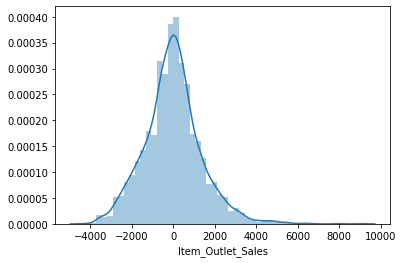

In [897]:
sns.distplot(y_test-predictions)

In [898]:
from sklearn import metrics

In [899]:
metrics.mean_absolute_error(y_test,predictions)

1033.1779577959705

In [900]:
# drop the null values
#data.dropna(how='any',inplace=True)


In [901]:
# Root Mean Squared Error on testing dataset

metrics.mean_squared_error(y_test,predictions)  #rmse test

1926432.4511107344

In [902]:
import numpy as np

In [903]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

1387.9598161008605

# Import Test data

In [904]:
df_test_sales=pd.read_csv("test_bigmart.csv")
df_test_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [905]:
df_test_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


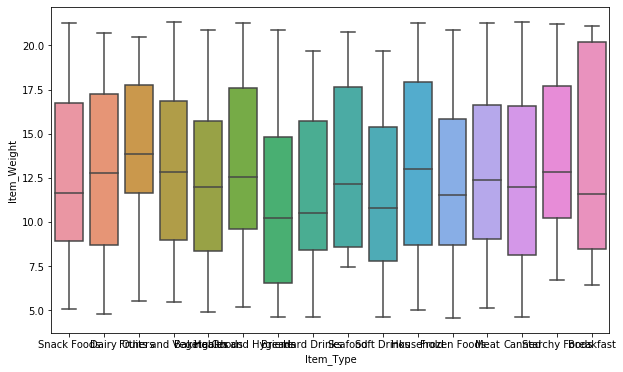

In [906]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Item_Type',y="Item_Weight",data=df_test_sales)

In [907]:
df_test_sales['Item_Weight'][df_test_sales['Item_Weight'].isnull()]= df_test_sales['Item_Weight'].mean()

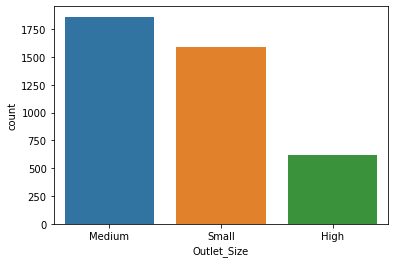

In [908]:
sns.countplot('Outlet_Size',data=df_test_sales)

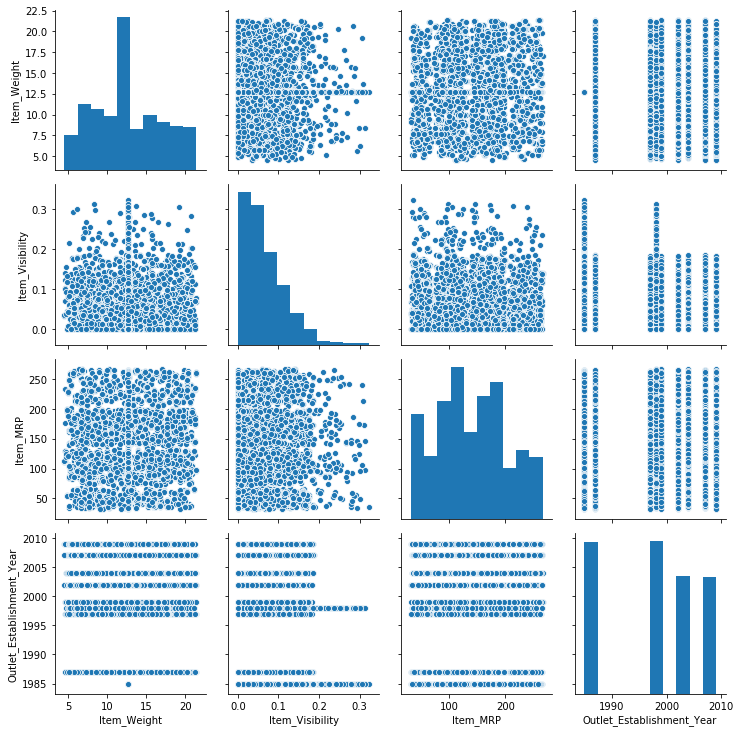

In [909]:
sns.pairplot(df_test_sales)

In [910]:
df_test_sale= df_test_sales[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year']]

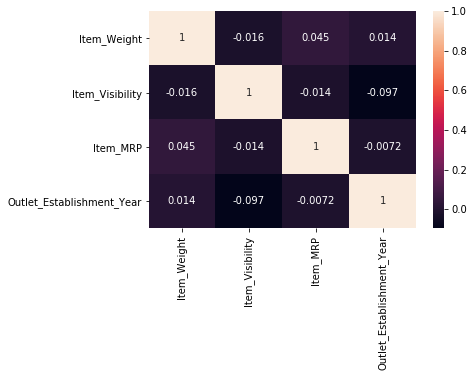

In [911]:
sns.heatmap(df_test_sale.corr(),annot=True)

In [912]:
X= df_test_sale

In [913]:
df_test_sales['Item_Outlet_Sales']=model.predict(X)

In [917]:
df_test_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1872.621992
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1373.908380
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,3596.000380
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2541.720040
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,3581.550471
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2454.825576
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2154.514336
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1764.384932
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,3496.163652


In [918]:
data_frame= df_test_sales[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]

In [919]:
data_frame.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1872.621992
1,FDW14,OUT017,1373.908380
2,NCN55,OUT010,3596.000380
3,FDQ58,OUT017,2541.720040
4,FDY38,OUT027,3581.550471


In [920]:
data_frame.to_csv('Big Market Sales.csv',index=0)

In [921]:
df_train_sales = pd.read_csv('train_bigmart.csv')
df_train_sales.head()


df_test_sales=pd.read_csv("test_bigmart.csv")
df_test_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [922]:
# checking the null values and  filling with respect to their data type for both train and test

df_train_sales.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [923]:
df_test_sales.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [924]:
df_train_sales.shape

(8523, 12)

In [925]:
df_test_sales.shape

(5681, 11)

In [926]:
df_train_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [927]:
df_test_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [928]:
df_train_sales['Item_Weight'].fillna(df_train_sales['Item_Weight'].median(),inplace=True)
df_train_sales['Outlet_Size'].fillna(df_train_sales['Outlet_Size'].mode()[0],inplace=True)
df_train_sales.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [929]:
df_test_sales['Item_Weight'].fillna(df_test_sales['Item_Weight'].median(),inplace=True)
df_test_sales['Outlet_Size'].fillna(df_test_sales['Outlet_Size'].mode()[0],inplace=True)
df_test_sales.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [930]:
data_frame1= df_train_sales[['Item_Identifier','Item_Weight','Outlet_Size']]
data_frame1.to_csv('Big Market Sales train full.csv',index=0)

In [931]:
data_frame1['Item_Weight'].median()

12.6

In [932]:
data_frame1['Outlet_Size'].mode()

0    Medium
dtype: object

# View Object data type

In [933]:
# selecting only oblect type data to have a look over on it

df_train_sales.select_dtypes(include=['object'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [934]:
df_train_sales['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [935]:
df_train_sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [936]:
# replacing repeated values with the appropriate name in test and train
df_train_sales.Item_Fat_Content.replace('LF','Low Fat',inplace=True)
df_train_sales.Item_Fat_Content.replace('low fat','Low Fat',inplace=True)
df_train_sales.Item_Fat_Content.replace('reg','Regular',inplace=True)

In [937]:
df_test_sales.Item_Fat_Content.replace('LF','Low Fat',inplace=True)
df_test_sales.Item_Fat_Content.replace('low fat','Low Fat',inplace=True)
df_test_sales.Item_Fat_Content.replace('reg','Regular',inplace=True)

In [938]:
df_train_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [939]:
df_test_sales['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

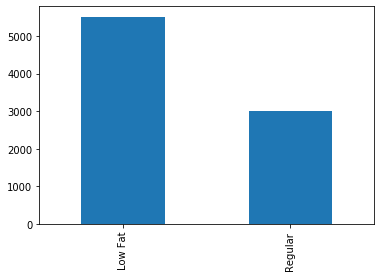

In [940]:
df_train_sales['Item_Fat_Content'].value_counts().plot.bar()

In [941]:
df_train_sales['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

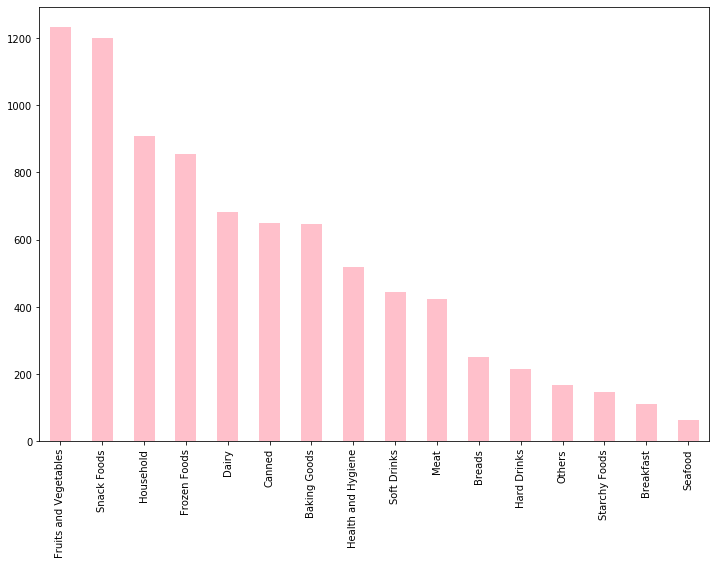

In [942]:
df_train_sales.Item_Type.value_counts().plot.bar(color='pink',figsize=(12,8))

In [943]:
df_train_sales.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

(0, 1000)

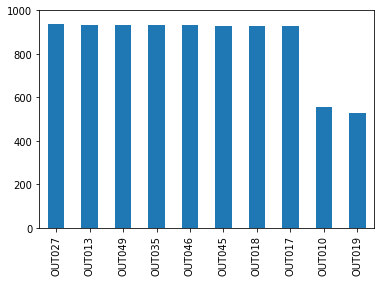

In [944]:
df_train_sales.Outlet_Identifier.value_counts().plot(kind='bar')
plt.ylim(0,1000)

In [945]:
# grouping outlet identifier with outlet sales
grp=df_train_sales[['Outlet_Identifier','Item_Outlet_Sales']]
grp.head(8523)

,Outlet_Identifier,Item_Outlet_Sales
0,OUT049,3735.1380
1,OUT018,443.4228
2,OUT049,2097.2700
3,OUT010,732.3800
4,OUT013,994.7052
...,...,...
8518,OUT013,2778.3834
8519,OUT045,549.2850
8520,OUT035,1193.1136
8521,OUT018,1845.5976


In [946]:
grp=grp.groupby(['Outlet_Identifier'],as_index=False).sum()
grp

,Outlet_Identifier,Item_Outlet_Sales
0,OUT010,1.883402e+05
1,OUT013,2.142664e+06
2,OUT017,2.167465e+06
3,OUT018,1.851823e+06
4,OUT019,1.796941e+05
5,OUT027,3.453926e+06
6,OUT035,2.268123e+06
7,OUT045,2.036725e+06
8,OUT046,2.118395e+06
9,OUT049,2.183970e+06


Text(0, 0.5, 'Item_outlet sales in(10^6)')

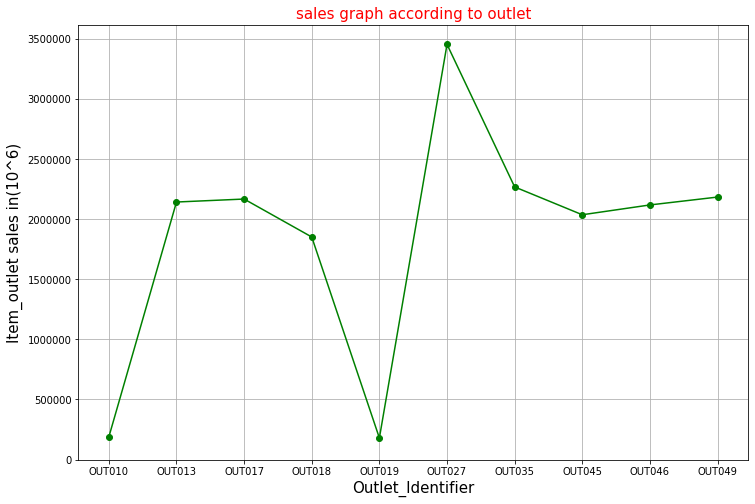

In [947]:
# ploting the grouped values to visualize the rise of the sales
plt.figure(figsize=(12,8))
plt.plot(grp['Outlet_Identifier'],grp['Item_Outlet_Sales'],'go-')# here 'go-' is the format type to show
plt.grid()
plt.title('sales graph according to outlet',fontsize=15,color='r')
plt.ylim(0,)
plt.xlabel('Outlet_Identifier',fontsize=15)
plt.ylabel('Item_outlet sales in(10^6)',fontsize=15)

In [948]:
df_train_sales.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [949]:
# groping years with sales 
grp=df_train_sales[['Outlet_Establishment_Year','Item_Outlet_Sales']]
grp.head()

,Outlet_Establishment_Year,Item_Outlet_Sales
0,1999,3735.1380
1,2009,443.4228
2,1999,2097.2700
3,1998,732.3800
4,1987,994.7052


In [950]:
grp1=grp.groupby(['Outlet_Establishment_Year'],as_index=False).sum()
grp1

,Outlet_Establishment_Year,Item_Outlet_Sales
0,1985,3.633620e+06
1,1987,2.142664e+06
2,1997,2.118395e+06
3,1998,1.883402e+05
4,1999,2.183970e+06
5,2002,2.036725e+06
6,2004,2.268123e+06
7,2007,2.167465e+06
8,2009,1.851823e+06


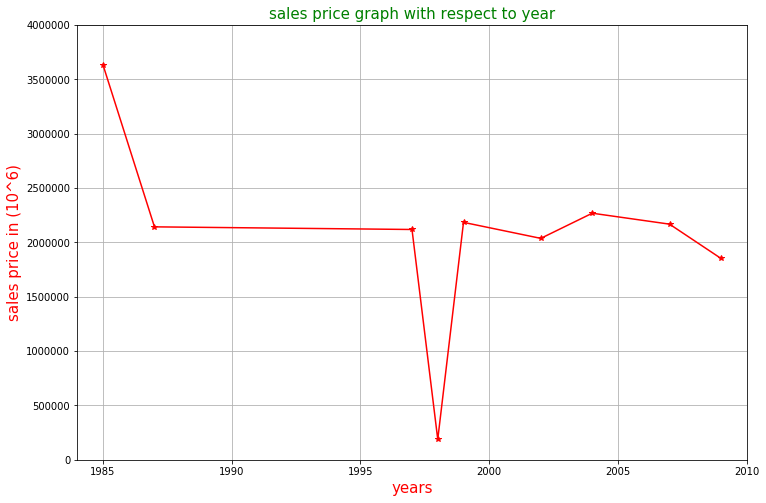

In [951]:
# visualizing the graph of sales with years
plt.figure(figsize=(12,8))
plt.plot(grp1['Outlet_Establishment_Year'],grp1['Item_Outlet_Sales'],'r*-')
plt.title('sales price graph with respect to year',fontsize=15,color='g')
plt.xlabel('years',fontsize=15,color='red')
plt.ylabel('sales price in (10^6)',fontsize=15,color='red')
plt.ylim(0,4000000)
plt.xlim(1984,2010)
plt.grid()

In [952]:
#  Geting  the comprsed(with less decimal point ) values of mrp,weight using round keyword
df_train_sales['Item_MRP']=df_train_sales['Item_MRP'].round()
df_train_sales['Item_Weight']=df_train_sales['Item_Weight'].round()
df_train_sales['Item_Visibility']=df_train_sales['Item_Visibility'].round(3)
df_train_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.0,Low Fat,0.016,Dairy,250.0,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,6.0,Regular,0.019,Soft Drinks,48.0,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,18.0,Low Fat,0.017,Meat,142.0,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.0,Regular,0.000,Fruits and Vegetables,182.0,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,9.0,Low Fat,0.000,Household,54.0,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,7.0,Low Fat,0.057,Snack Foods,215.0,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.0,Regular,0.047,Baking Goods,108.0,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,11.0,Low Fat,0.035,Health and Hygiene,85.0,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.0,Regular,0.145,Snack Foods,103.0,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [953]:
df_test_sales['Item_MRP']=df_test_sales['Item_MRP'].round()
df_test_sales['Item_Weight']=df_test_sales['Item_Weight'].round()
df_test_sales['Item_Visibility']=df_test_sales['Item_Visibility'].round(3)
df_test_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,21.0,Low Fat,0.008,Snack Foods,108.0,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.0,Regular,0.038,Dairy,87.0,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,15.0,Low Fat,0.100,Others,242.0,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.0,Low Fat,0.015,Snack Foods,155.0,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.0,Regular,0.119,Dairy,234.0,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.0,Regular,0.013,Snack Foods,141.0,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,8.0,Regular,0.143,Starchy Foods,169.0,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.074,Health and Hygiene,119.0,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.0,Regular,0.000,Canned,215.0,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [954]:
df_train_sales['Item_Weight'].value_counts()

13.0    1819
8.0      537
12.0     537
9.0      528
7.0      507
18.0     506
16.0     493
10.0     473
20.0     462
6.0      424
14.0     417
15.0     375
19.0     370
17.0     352
11.0     317
21.0     233
5.0      173
Name: Item_Weight, dtype: int64

In [955]:
df_train_sales['Item_Weight'].describe()

count    8523.000000
mean       12.896867
std         4.243392
min         5.000000
25%         9.000000
50%        13.000000
75%        16.000000
max        21.000000
Name: Item_Weight, dtype: float64

In [956]:
# finding the relation of item types towards weight using crosstab
pd.crosstab(df_train_sales['Item_Type'],df_train_sales['Item_Weight'],margins=True)

# if margins is true it will give the totalcount in rows & columns

Item_Weight,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,All
Item_Type,,,,,,,,,,,,,,,,,,
Baking Goods,26,37,42,52,36,46,24,40,125,33,26,43,17,24,18,34,25,648
Breads,16,14,26,8,16,18,8,13,64,12,10,12,11,14,0,5,4,251
Breakfast,0,5,3,20,10,0,7,4,21,6,0,10,5,0,5,3,11,110
Canned,21,27,45,63,48,33,9,41,129,38,27,47,48,3,25,35,10,649
Dairy,12,34,37,30,36,11,43,42,157,52,4,36,35,52,26,50,25,682
Frozen Foods,14,37,55,45,76,40,28,48,182,57,28,52,36,61,43,39,15,856
Fruits and Vegetables,6,70,63,79,53,65,50,75,281,58,56,88,43,87,52,70,36,1232
Hard Drinks,7,13,3,35,22,24,3,16,31,4,13,10,7,11,11,4,0,214
Health and Hygiene,16,11,14,38,20,40,38,52,93,27,25,15,18,38,31,31,13,520


In [957]:
df_train_sales['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [958]:
df_train_sales['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [959]:
 # grouging outlet tye with sales
super_grp=df_train_sales[['Outlet_Type','Item_Outlet_Sales']]
super_grp.head()

,Outlet_Type,Item_Outlet_Sales
0,Supermarket Type1,3735.1380
1,Supermarket Type2,443.4228
2,Supermarket Type1,2097.2700
3,Grocery Store,732.3800
4,Supermarket Type1,994.7052


In [960]:
grp2=super_grp.groupby(['Outlet_Type'],as_index=False).sum()
grp2

,Outlet_Type,Item_Outlet_Sales
0,Grocery Store,3.680343e+05
1,Supermarket Type1,1.291734e+07
2,Supermarket Type2,1.851823e+06
3,Supermarket Type3,3.453926e+06


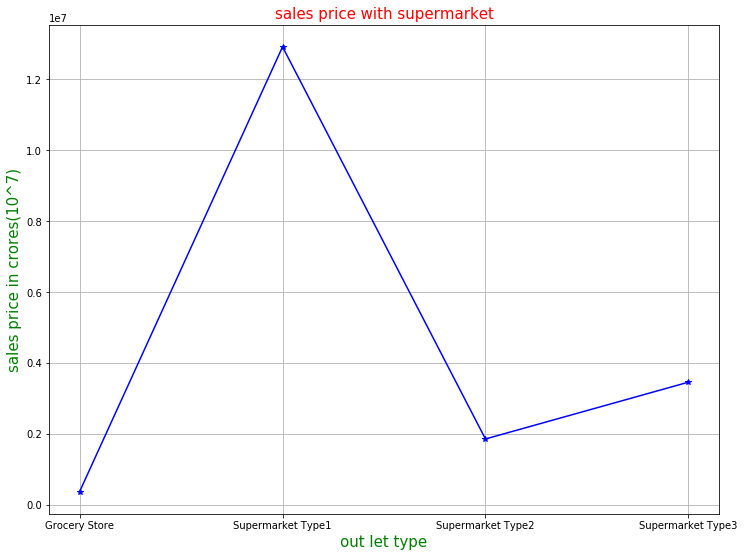

In [961]:
# visualizing sales with respect to outlet type 
plt.figure(figsize=(12,9))
plt.plot(grp2['Outlet_Type'],grp2['Item_Outlet_Sales'],'b*-')
plt.title('sales price with supermarket',fontsize=15,color='r')
plt.xlabel('out let type',fontsize=15,color='green')
plt.ylabel('sales price in crores(10^7)',fontsize=15,color='green')
plt.grid()

In [962]:
df_train_sales['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

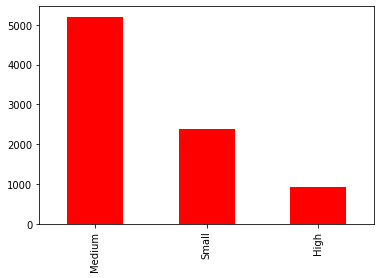

In [963]:
df_train_sales['Outlet_Size'].value_counts().plot.bar(color='r')

In [964]:
df_train_sales['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

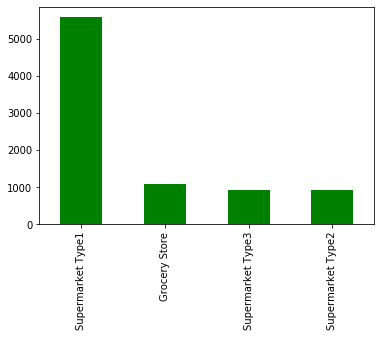

In [965]:
df_train_sales['Outlet_Type'].value_counts().plot.bar(color='g')

In [966]:
df_train_sales['Item_MRP'].describe()

count    8523.000000
mean      140.989088
std        62.275770
min        31.000000
25%        94.000000
50%       143.000000
75%       186.000000
max       267.000000
Name: Item_MRP, dtype: float64

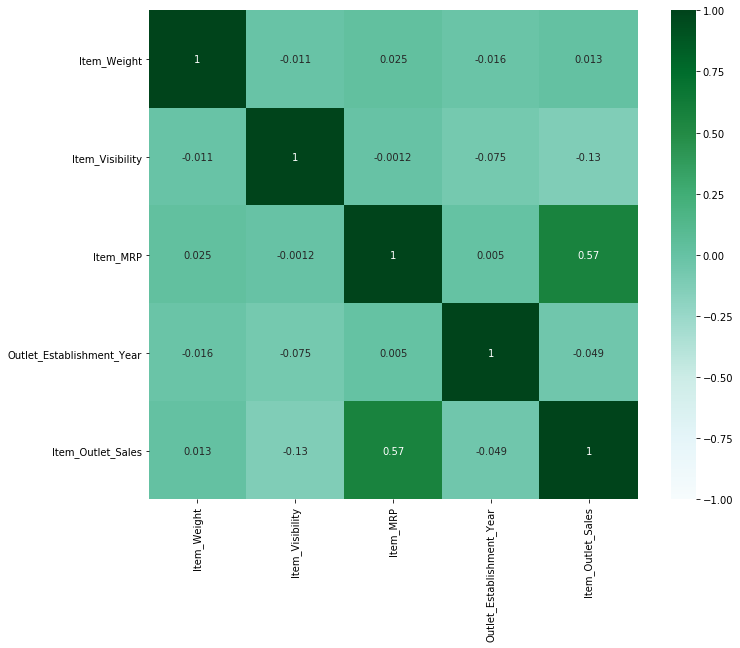

In [967]:
# correlating the train data
matrix=df_train_sales.corr()
plt.figure(figsize=(12,9))
sns.heatmap(matrix,vmin=-1,vmax=1,square=True,annot=True,cmap='BuGn')

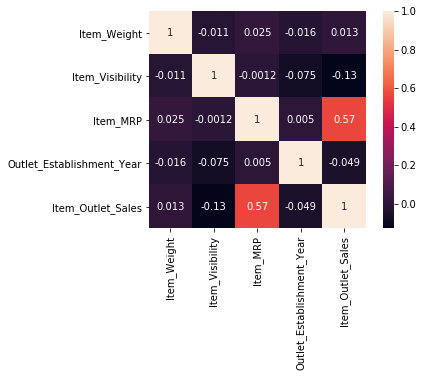

In [968]:
# by default correlation
sns.heatmap(matrix,square=True,annot=True)

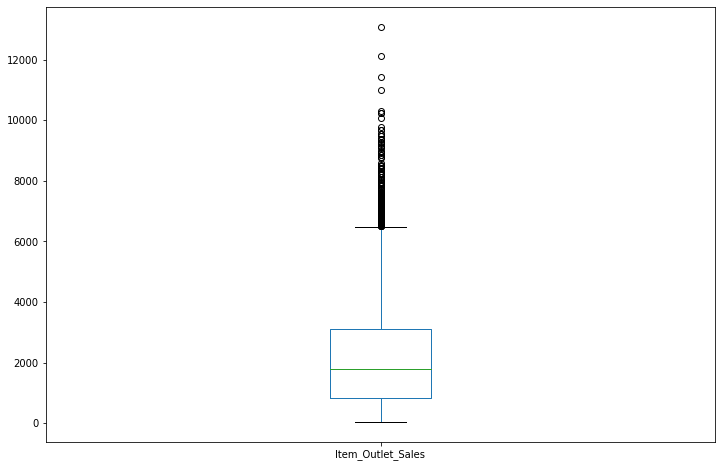

In [969]:
# finding the inter Quartile rang using boxplot
df_train_sales['Item_Outlet_Sales'].plot.box(figsize=(12,8))

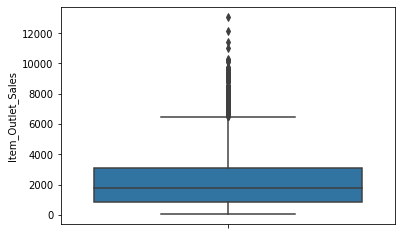

In [970]:
sns.boxplot(y=df_train_sales['Item_Outlet_Sales'])

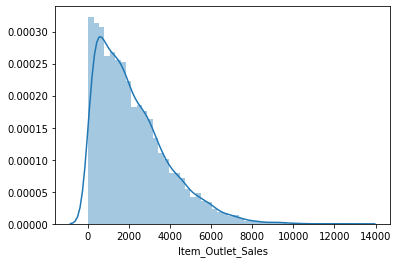

In [971]:
# ploting the distance graph using seaborn 
sns.distplot(df_train_sales['Item_Outlet_Sales'])

Text(0.5, 0.98, ' boxplot ')

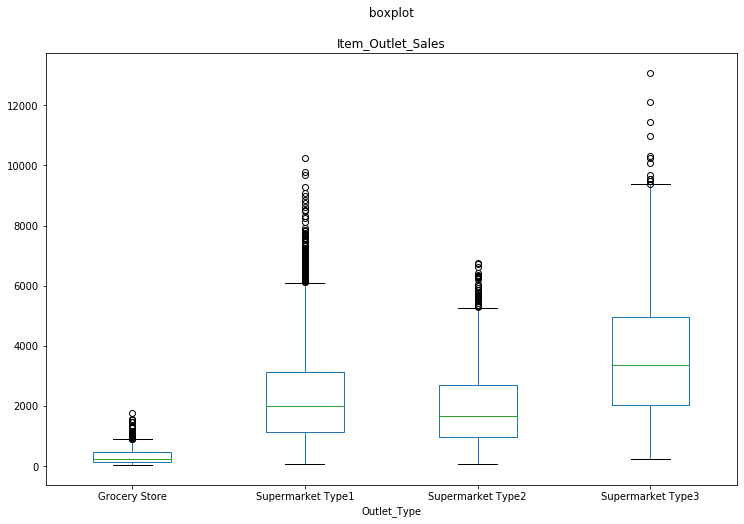

In [972]:
#boxplot for sale with columns in matplotlib
df_train_sales.boxplot(column='Item_Outlet_Sales',by='Outlet_Type',figsize=(12,8),grid=False)
plt.suptitle(" boxplot ")

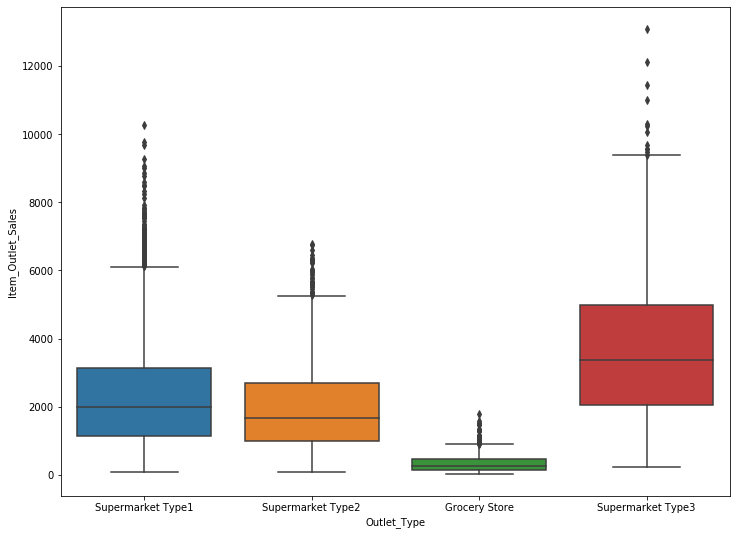

In [973]:
# boxplot with seaborn
plt.figure(figsize=(12,9))
sns.boxplot(y=df_train_sales['Item_Outlet_Sales'],x=df_train_sales['Outlet_Type'])

In [974]:
 # checking duplicates
df_train_sales=df_train_sales.drop_duplicates()
df_train_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.0,Low Fat,0.016,Dairy,250.0,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,6.0,Regular,0.019,Soft Drinks,48.0,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,18.0,Low Fat,0.017,Meat,142.0,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.0,Regular,0.000,Fruits and Vegetables,182.0,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,9.0,Low Fat,0.000,Household,54.0,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,7.0,Low Fat,0.057,Snack Foods,215.0,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.0,Regular,0.047,Baking Goods,108.0,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,11.0,Low Fat,0.035,Health and Hygiene,85.0,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.0,Regular,0.145,Snack Foods,103.0,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [975]:
df_test_sales=df_test_sales.drop_duplicates()
df_test_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,21.0,Low Fat,0.008,Snack Foods,108.0,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.0,Regular,0.038,Dairy,87.0,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,15.0,Low Fat,0.100,Others,242.0,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.0,Low Fat,0.015,Snack Foods,155.0,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.0,Regular,0.119,Dairy,234.0,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.0,Regular,0.013,Snack Foods,141.0,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,8.0,Regular,0.143,Starchy Foods,169.0,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.074,Health and Hygiene,119.0,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.0,Regular,0.000,Canned,215.0,OUT017,2007,Medium,Tier 2,Supermarket Type1


Text(0.5, 1.0, 'box plot mrp')

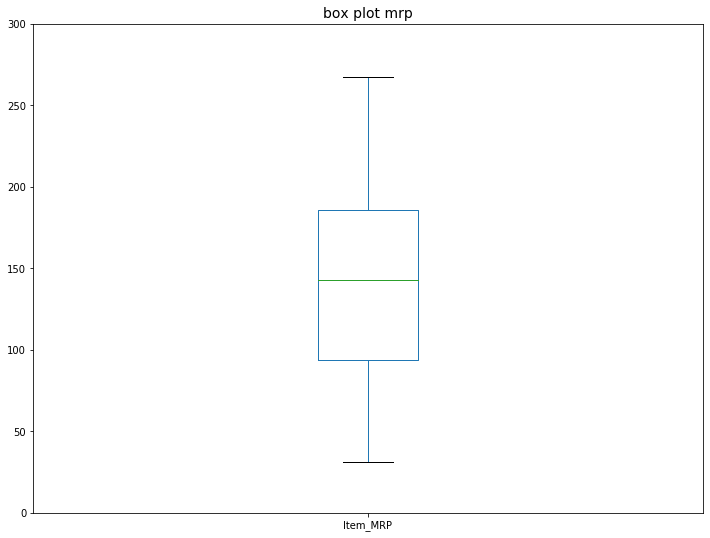

In [976]:
df_train_sales['Item_MRP'].plot.box(figsize=(12,9))
plt.ylim(0,300)
plt.title('box plot mrp',fontsize=14)

In [977]:
pd.crosstab(df_train_sales['Item_Type'],df_train_sales['Item_Fat_Content'])

Item_Fat_Content,Low Fat,Regular
Item_Type,,
Baking Goods,329,319
Breads,140,111
Breakfast,41,69
Canned,341,308
Dairy,418,264
Frozen Foods,450,406
Fruits and Vegetables,630,602
Hard Drinks,214,0
Health and Hygiene,520,0


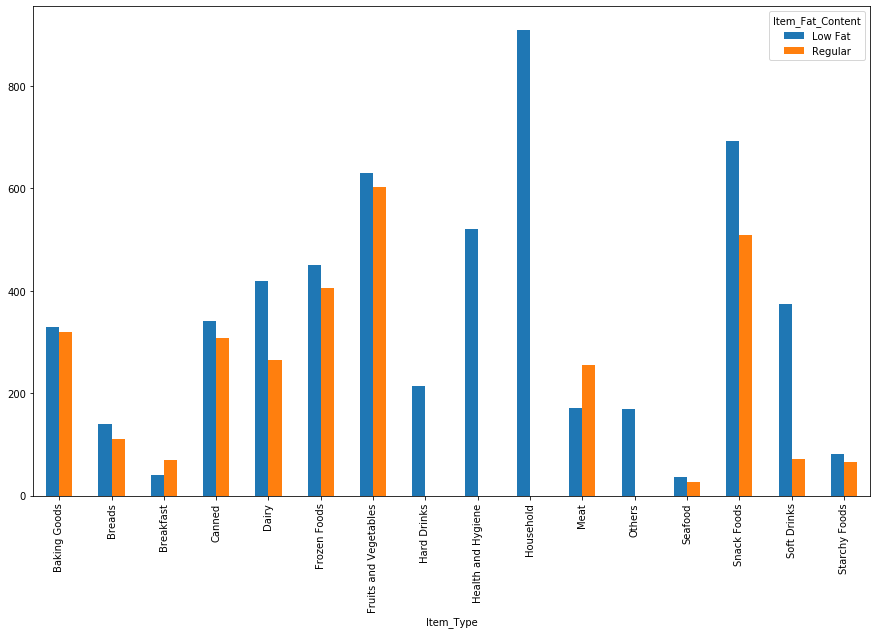

In [978]:
pd.crosstab(df_train_sales['Item_Type'],df_train_sales['Item_Fat_Content']).plot.bar(figsize=(15,9))

In [979]:
pd.crosstab(df_train_sales['Outlet_Size'],df_train_sales['Item_Fat_Content'])

Item_Fat_Content,Low Fat,Regular
Outlet_Size,,
High,606,326
Medium,3361,1842
Small,1550,838


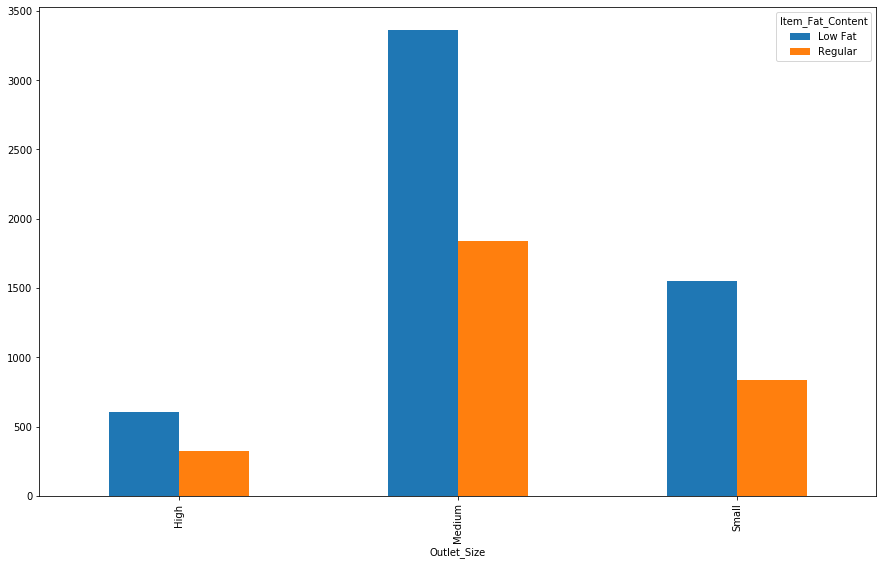

In [980]:
pd.crosstab(df_train_sales['Outlet_Size'],df_train_sales['Item_Fat_Content']).plot.bar(figsize=(15,9))

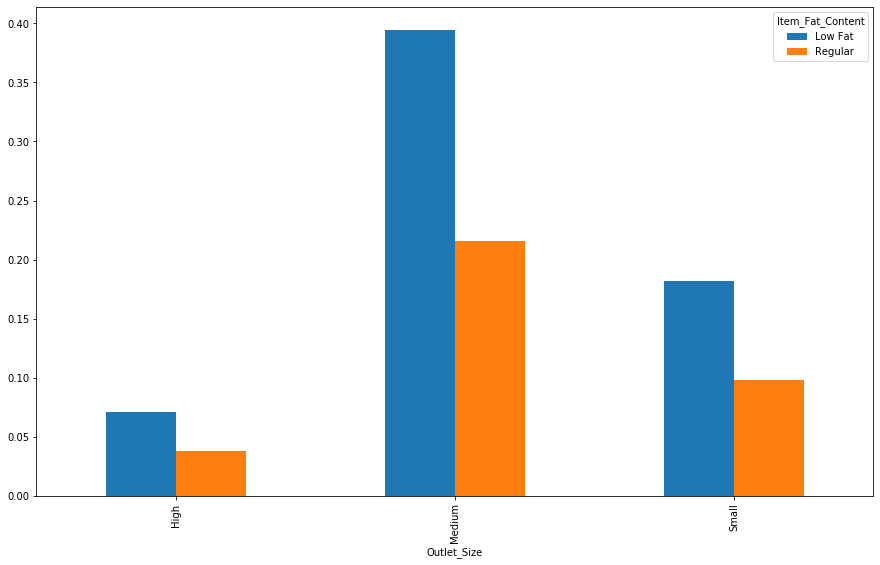

In [981]:
pd.crosstab(df_train_sales['Outlet_Size'],df_train_sales['Item_Fat_Content'],normalize=True).plot.bar(figsize=(15,9))

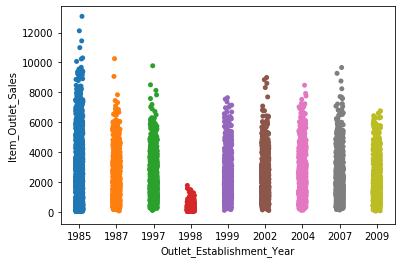

In [982]:
sns.stripplot(df_train_sales['Outlet_Establishment_Year'],df_train_sales['Item_Outlet_Sales'])

In [983]:
df_test_sales=df_test_sales.drop(['Item_Identifier','Item_Visibility'],1)
df_test_sales.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,21.0,Low Fat,Snack Foods,108.0,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,8.0,Regular,Dairy,87.0,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,15.0,Low Fat,Others,242.0,OUT010,1998,Medium,Tier 3,Grocery Store
3,7.0,Low Fat,Snack Foods,155.0,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,12.0,Regular,Dairy,234.0,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [984]:
#label Encoding technicue
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [985]:
df_train_sales['Item_Fat_Content']=le.fit_transform (df_train_sales['Item_Fat_Content'])
df_train_sales['Outlet_Location_Type']=le.fit_transform(df_train_sales['Outlet_Location_Type'])
df_train_sales['Item_Type']=le.fit_transform(df_train_sales['Item_Type'])
df_train_sales['Outlet_Size']=le.fit_transform(df_train_sales['Outlet_Size'])
df_train_sales['Outlet_Identifier']=le.fit_transform(df_train_sales['Outlet_Identifier'])
df_train_sales['Outlet_Type']=le.fit_transform(df_train_sales['Outlet_Type'])

In [986]:
df_test_sales['Item_Fat_Content']=le.fit_transform (df_test_sales['Item_Fat_Content'])
df_test_sales['Outlet_Location_Type']=le.fit_transform(df_test_sales['Outlet_Location_Type'])
df_test_sales['Item_Type']=le.fit_transform(df_test_sales['Item_Type'])
df_test_sales['Outlet_Size']=le.fit_transform(df_test_sales['Outlet_Size'])
df_test_sales['Outlet_Identifier']=le.fit_transform(df_test_sales['Outlet_Identifier'])
df_test_sales['Outlet_Type']=le.fit_transform(df_test_sales['Outlet_Type'])

In [987]:
df_test_sales

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,21.0,0,13,108.0,9,1999,1,0,1
1,8.0,1,4,87.0,2,2007,1,1,1
2,15.0,0,11,242.0,0,1998,1,2,0
3,7.0,0,13,155.0,2,2007,1,1,1
4,12.0,1,4,234.0,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,10.0,1,13,141.0,8,1997,2,0,1
5677,8.0,1,15,169.0,3,2009,1,2,2
5678,10.0,0,8,119.0,7,2002,1,1,1
5679,15.0,1,3,215.0,2,2007,1,1,1


In [988]:
train=df_train_sales
test=df_test_sales

In [989]:
x=train.drop('Item_Outlet_Sales',1)
y=train.Item_Outlet_Sales
# we are using the logirthmic values of the output to get better respones in score it is stored in Y
Y=np.log(y)
Y

0       8.225540
1       6.094524
2       7.648392
3       6.596300
4       6.902446
          ...   
8518    7.929625
8519    6.308617
8520    7.084322
8521    7.520558
8522    6.640751
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0xf7f6029808>,
 'caps': [<matplotlib.lines.Line2D at 0xf7f6029e88>,
 'boxes': [<matplotlib.lines.Line2D at 0xf7f6020f48>],
 'medians': [<matplotlib.lines.Line2D at 0xf7f602ef08>],
 'fliers': [<matplotlib.lines.Line2D at 0xf7f6033808>],
 'means': []}

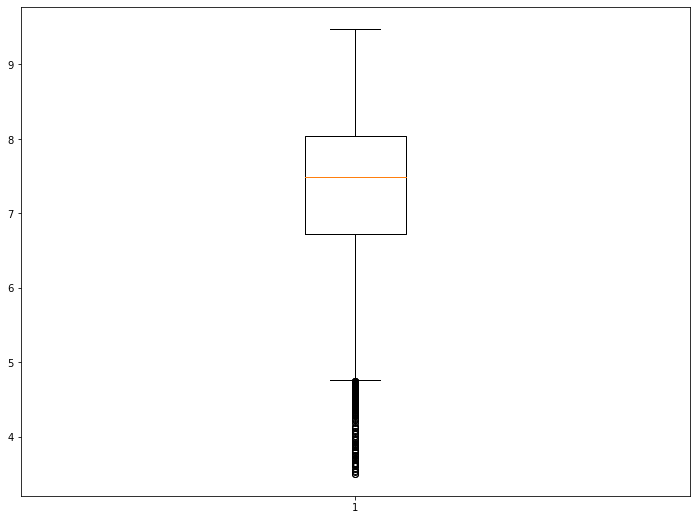

In [990]:
#  ploting boxplot & distance for log values
plt.figure(figsize=(12,9))
plt.boxplot(Y)

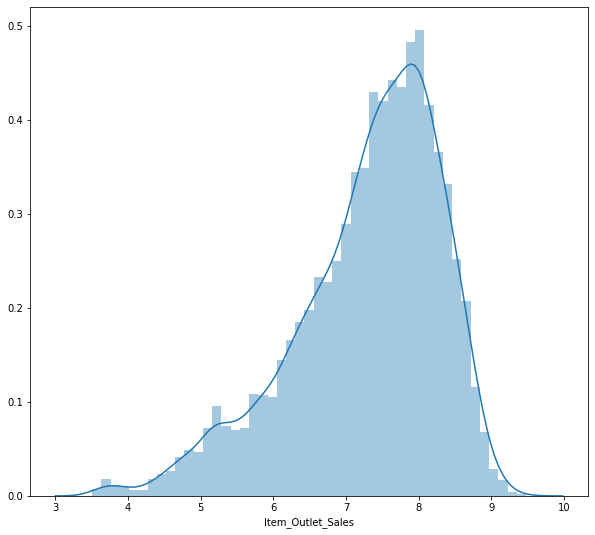

In [991]:
plt.figure(figsize=(10,9))
sns.distplot(Y)

In [992]:
# generating dummie values for the label encoded columns
x=pd.get_dummies(x,columns=['Item_Type','Item_Fat_Content','Outlet_Identifier','Outlet_Location_Type','Outlet_Size','Outlet_Type'])
x

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,FDA15,9.0,0.016,250.0,1999,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
1,DRC01,6.0,0.019,48.0,2009,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,FDN15,18.0,0.017,142.0,1999,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,FDX07,19.0,0.000,182.0,1998,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,NCD19,9.0,0.000,54.0,1987,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,7.0,0.057,215.0,1987,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
8519,FDS36,8.0,0.047,108.0,2002,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8520,NCJ29,11.0,0.035,85.0,2004,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
8521,FDN46,7.0,0.145,103.0,2009,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [993]:
test=pd.get_dummies(test,columns=['Item_Type','Item_Fat_Content','Outlet_Identifier','Outlet_Location_Type','Outlet_Size','Outlet_Type'])
test

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,21.0,108.0,1999,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,8.0,87.0,2007,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
2,15.0,242.0,1998,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
3,7.0,155.0,2007,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,12.0,234.0,1985,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.0,141.0,1997,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
5677,8.0,169.0,2009,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5678,10.0,119.0,2002,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
5679,15.0,215.0,2007,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [994]:
# spliting &fitting values of TRAIN DATA 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size =0.3)

In [995]:
df_test_sales=pd.read_csv("test_bigmart.csv")
df_test_sales.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [996]:
df_sale=df_train_sales[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales',]]

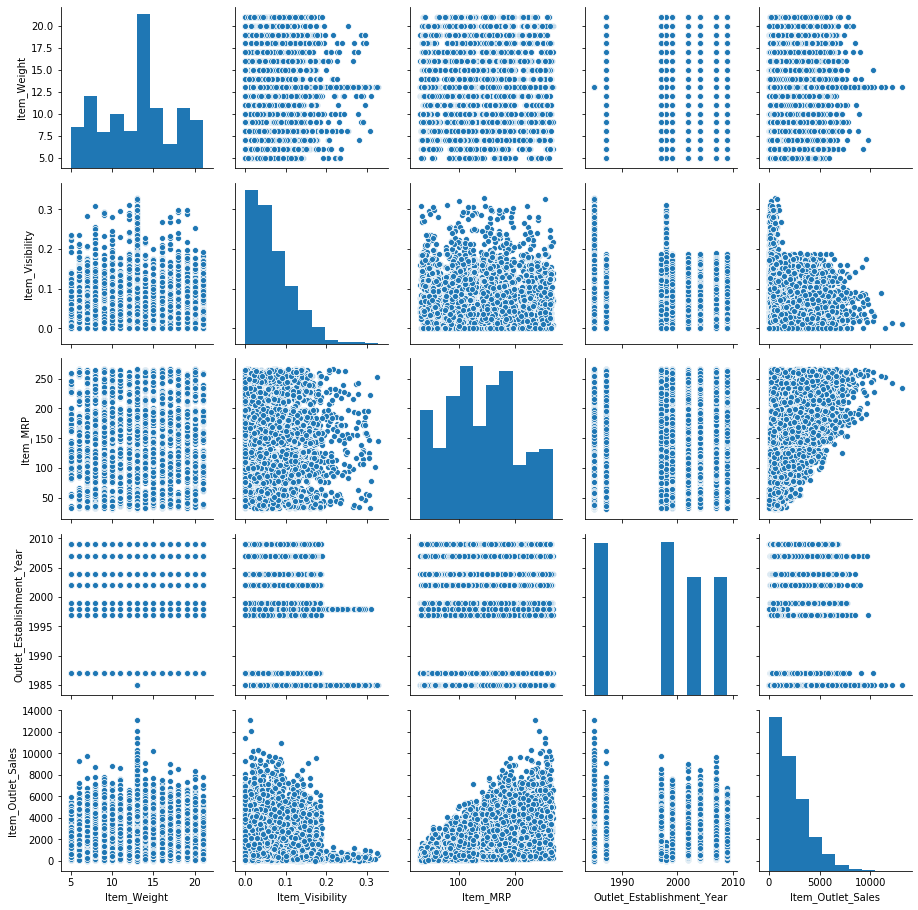

In [997]:
sns.pairplot(df_sale)

In [998]:
# spliting &fitting values of TRAIN DATA 
x=df_sale.drop(['Item_Outlet_Sales'],axis=1)
y=df_sale['Item_Outlet_Sales']
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.33,random_state=105)

In [999]:
from sklearn.linear_model import LinearRegression
#linear regression
model= LinearRegression()


In [1000]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1001]:
predy=model.predict(x_test)

In [1002]:
predy

array([2608.92509376, 1930.78778705, 1690.70486454, ..., 3845.14075613,
       2252.8970419 , 1684.54910407])

In [1003]:
y_test

4901    4986.8420
7572    2681.8424
4522    2011.3818
621     1332.9316
2563    2127.8968
          ...    
8194     469.3890
6294    1162.4868
8127    6008.1792
5544     159.7920
3406    2050.6640
Name: Item_Outlet_Sales, Length: 2813, dtype: float64

In [1004]:
#  finding error from predected values (-) true value
error=predy-y_test
error

4901   -2377.916906
7572    -751.054613
4522    -320.676935
621      390.165955
2563    -486.648805
           ...     
8194    1102.425378
6294    -284.817965
8127   -2163.038444
5544    2093.105042
3406    -366.114896
Name: Item_Outlet_Sales, Length: 2813, dtype: float64

In [1005]:
# finding mean square error
totalerror=np.sum(error*error)# error^2=error*error
mse=totalerror/len(predy)
print('MSE:',mse)

MSE: 1925947.7448595974


In [1006]:
# finding root mean square
rms=np.sqrt(mse)
rms

1387.7851940626824

In [1007]:
model.score(x_train,y_train)

0.347747680749518

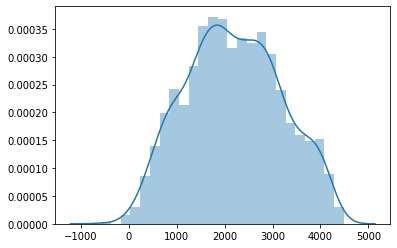

In [1008]:
sns.distplot(predy)

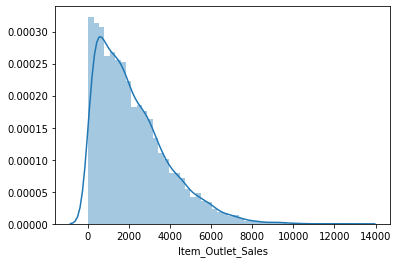

In [1009]:
sns.distplot(y)

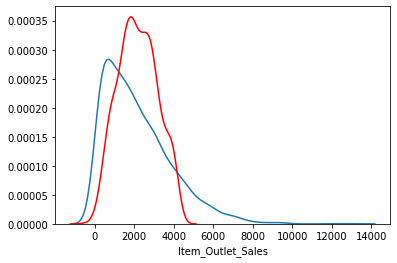

In [1010]:
#comparing the outputs predected vs true output
ax1=sns.distplot(y_test,hist=False)
sns.distplot(predy,hist=False,ax=ax1,color='r')

In [1011]:


# performing standard scaler operation fot it
from sklearn.preprocessing import StandardScaler
x_trainsc=StandardScaler().fit_transform(x_train)
x_testsc=StandardScaler().fit_transform(x_test)



In [1012]:
model=LinearRegression()
model.fit(x_trainsc,y_train)
predy=model.predict(x_testsc)

In [1013]:
model.score(x_trainsc,y_train)

0.34774768074951823

In [1014]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,predy)
r2=r2_score(y_test,predy)

In [1015]:
mse

1926595.1759937594

In [1016]:
r2

0.33042916747380213

In [1017]:
# using log  of the y
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.3)
model=LinearRegression()
model.fit(x_train,y_train)
predection=model.predict(x_test)

In [1018]:
model.score(x_train,y_train)

0.2993411376922088

In [1019]:


from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(predection,y_test)
r2=r2_score(predection,y_test)
print('mse:',mse,'\n','rmse:',r2)



mse: 0.7066769345105259 
 rmse: -1.212715678013582


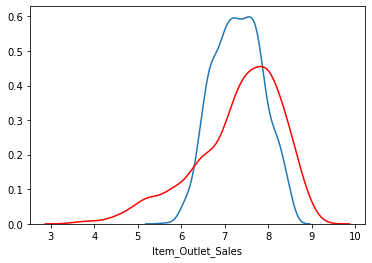

In [1020]:
ax=sns.distplot(predection,hist=False)
sns.distplot(y_test,hist=False,color='r')

In [1021]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(criterion='mse',random_state=40)

In [1022]:
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [1023]:
model.score(x_train,y_train)

0.9144636411909309

In [1024]:
model.score(x_test,y_test)

0.4436782149225474

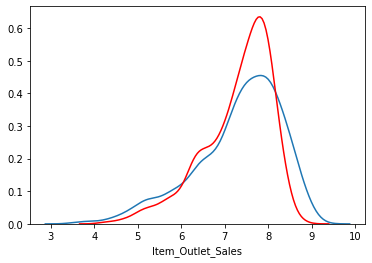

In [1025]:


ax1=sns.distplot(y_test,hist=False)
sns.distplot(pred,hist=False,color='r')    



In [1026]:
from sklearn.model_selection import cross_val_score
model=RandomForestRegressor()
score=cross_val_score(model,x,y,cv=5)
score

array([0.36270979, 0.34536785, 0.35409768, 0.34625351, 0.31734026])

In [1027]:
# converting data into standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_sc = sc.fit_transform(x_train)
test_sc = sc.transform(x_test)
model=RandomForestRegressor()
model.fit(train_sc,y_train)
predection=model.predict(test_sc)

In [1028]:
model.score(train_sc,y_train)

0.9141420989236491

In [1029]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)
y_prediction = knn.predict(x_test)
knn.score(x_test,y_test)

0.1909186501312875

In [1030]:
knn.score(x_train,y_train)

0.4517316898535372

In [1031]:
from sklearn.tree import DecisionTreeRegressor
x_train, x_test, y_train, y_test= train_test_split(x,Y, random_state=51,test_size =0.3)
model=DecisionTreeRegressor(criterion='mse')
model.fit(x_train,y_train)
predection=model.predict(x_test)
model.score(x_train,y_train)

0.9895156737912765

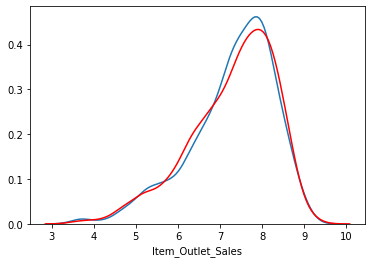

In [1032]:
ax1=sns.distplot(y_test,hist=False)
sns.distplot(predection,hist=False,color='r') 

In [1033]:
# reconverting the log values into normal expotenial values
predection=np.exp(predection)
y_test=np.exp(y_test)

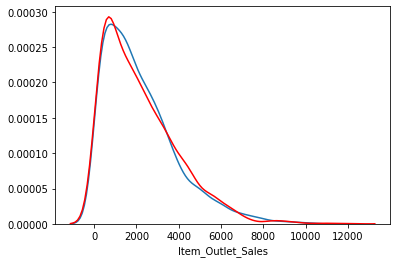

In [1034]:


ax1=sns.distplot(y_test,hist=False)
sns.distplot(predection,hist=False,color='r')



In [1045]:
# preforming decission tree regressor with log Y values
model=DecisionTreeRegressor(criterion='mse')
model.fit(x,Y)
model.score(x,Y)

0.9882053074899051

In [1047]:
# preforming decission tree regressor with log Y values
model=DecisionTreeRegressor(criterion='mse')
model.fit(x,y)
model.score(x,y)

0.989601903347751

In [1049]:
out=model.predict(test)
out

ValueError: Number of features of the model must match the input. Model n_features is 4 and input n_features is 41 